# k-Nearest Neighbors

k-Nearest Neighbors is a nonparametric model. The idea is simple:

* choose hyperparameter $k\in\mathbb N$;
* choose a distance metric in $\mathbb R^d$ (for example, Euclidean);
* for a sample $\boldsymbol x \in \mathbb R^d$ find its $k$ nearest neighbors among the training dataset;
* classify or predict the label of $\boldsymbol x$ according to the labels of its neighbors.

Distance between two vectors $\boldsymbol x, \boldsymbol y \in \mathbb R^d$ is defined as norm of their difference

$$
    \rho(\boldsymbol x, \boldsymbol y) = \Vert \boldsymbol x-  \boldsymbol y\Vert.
$$

See {ref}`vector norm <vector-norm>` section for details.

<!--
## Distance in $\mathbb R^d$

How to calculate distance $\rho (\boldsymbol x, \boldsymbol y)$ of vectors $\boldsymbol x, \boldsymbol y \in\mathbb R^d$?

* Euclidean distance: $\rho_2(\boldsymbol x, \boldsymbol y) = \sqrt{\sum\limits_{i=1}^d (x_i - y_i)^2}$
* Manhattan distance: $\rho_1(\boldsymbol x, \boldsymbol y) = \sum\limits_{i=1}^d |x_i - y_i|$
* Minkowski distance: $\rho_p(\boldsymbol x, \boldsymbol y) = \Big(\sum\limits_{i=1}^d |x_i - y_i|^p \Big)^{\frac 1p}$, $p \geqslant 1$

```{note}
The distance to zero vector $\rho_p(\boldsymbol x, \boldsymbol 0)$ is called **$p$-norm**:

$$
    \| \boldsymbol x \|_p = \Big(\sum\limits_{i=1}^d |x_i|^p \Big)^{\frac 1p}
$$

The **unit ball** in $\mathbb R^d$ with respect to $p$-norm is defined as

$$
    \{\boldsymbol x \in \mathbb R^d \colon \|\boldsymbol x\|_p \leqslant 1\}.
$$
```
-->

## k-NN algorithm

```{figure} https://cdn.analyticsvidhya.com/wp-content/uploads/2018/03/knn3.png
:name: simple-knn
:align: center
:width: 500px

Simple k-NN
```

Given the training dataset $\{(\boldsymbol x_i, y_i)\}_{i=1}^n$, how to classify a new object $\boldsymbol x$?

1. Sort distances $\rho (\boldsymbol x_i, \boldsymbol x)$ in increasing order:

    $$
    \rho (\boldsymbol x_{(1)}, \boldsymbol x) \leqslant \rho (\boldsymbol x_{(2)}, \boldsymbol x) \leqslant \ldots \leqslant \rho (\boldsymbol x_{(n)}, \boldsymbol x) 
    $$

2. So $\boldsymbol x_{(i)}$ is the $i$-th neighbor of the object $\boldsymbol x$

3. Let $y_{(i)}$ be the label of $\boldsymbol x_{(i)}$

4. The label $\hat y$ of the object $\boldsymbol x\in\mathbb R^d$ is set to the most common label among $k$ neighbors of $\boldsymbol x$:

$$
    \widehat y = \arg\max_{y\in Y} \sum\limits_{i=1}^k \mathbb I[y = y_{(i)}]
$$

For regression task the last step is subsituted by 

$$
    \widehat y = \frac 1k\sum\limits_{i=1}^k y_{(i)}.
$$

Note that $\widehat y = y_{(1)}$ if $k=1$.

### Voronoi tessellation

A k-NN classifier with $k=1$ induces a **Voronoi tessellation** of the points.
This is a partition of space which associates a region $V(\boldsymbol x_i)$ with each sample $\boldsymbol x_i$ in such a way that all points in $V(\boldsymbol x_i)$ are closer to  $\boldsymbol x_i$ than to any other point. In other words,

$$
    V(\boldsymbol x_i) = \{\boldsymbol z \in \mathbb R^n\colon \rho(\boldsymbol x_i, \boldsymbol z) < \rho(\boldsymbol x_j, \boldsymbol z) \text{ for all }j\ne i\}.
$$

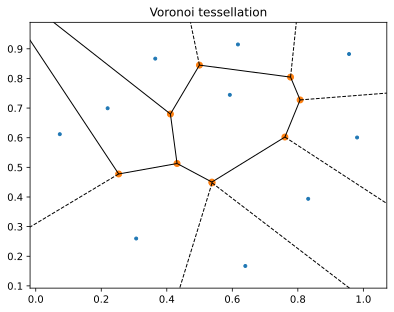

In [3]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_formats = ['svg']

n = 10
points = np.random.rand(n, 2)
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.title("Voronoi tessellation");

<span style="display:none" id="q_1nn_train_loss">W3sicXVlc3Rpb24iOiAiU3VwcG9zZSB3ZSBhcmUgdHJhaW5pbmcgJDEkLU5OIGFsZ29yaXRobSB1c2luZyBtaXNjbGFzc2lmaWNhdGlvbiByYXRlIGFzIHRoZSBsb3NzIGZ1bmN0aW9uLiBXaGF0IHdpbGwgYmUgdGhlIHRyYWluIGVycm9yPyIsICJ0eXBlIjogIm51bWVyaWMiLCAiYW5zd2VycyI6IFt7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAwLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJSaWdodCBvbiEgQWxsIHRyYWluaW5nIHBvaW50cyB3aWxsIGJlIGNsYXNzaWZpZWQgY29ycmVjdGx5In0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFstMTAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMCwgMF0sICJmZWVkYmFjayI6ICJNaXNjbGFzc2lmaWNhdGlvbiByYXRlIG11c3QgYmUgYmV0d2VlbiAwIGFuZCAxIn0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFsxLjAwMDAwMDAwMDEsIDEwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDBdLCAiZmVlZGJhY2siOiAiTWlzY2xhc3NpZmljYXRpb24gcmF0ZSBtdXN0IGJlIGJldHdlZW4gMCBhbmQgMSJ9LCB7InR5cGUiOiAiZGVmYXVsdCIsICJmZWVkYmFjayI6ICJObywgdGhpcyBpcyBub3QgdHJ1ZSJ9XX1d</span>

In [4]:
from jupyterquiz import display_quiz
display_quiz("#q_1nn_train_loss")

<IPython.core.display.Javascript object>

## Role of $k$

The decision boundaries become smoother as $k$ grows. Here is an example from {cite:p}`pml1Book` (figure 16.2): k-NN algorithm is applied to simulated data with three clusters.

```{figure} ../images/Murphy_16_2.png
:align: center
```

**Q.** Look at the graph of train and test errors. For which values of $k$ we can suspect overfitting?

```{admonition} Effective number of parameters of $k$-NN
:class: note, dropdown
It is equal to $\frac n k$. To get an idea of why, note that if the neighborhoods were nonoverlapping, there would be $\frac nk$ neighborhoods and we would fit one parameter (a mean) in each neighborhood ({cite:p}`hastie2009elements`, p. 14)
```

## Curse of dimensionality

```{figure} https://www.researchgate.net/publication/347363976/figure/fig4/AS:970060722089985@1608291907488/Geometry-for-the-computation-of-the-volume-of-the-slice-We-ideally-slice-the-large-piece.png
:align: center
```
Only red part of watermelon is useful, and watermelon rind is thrown away. Suppose that the watermelon is a ball of radius $R$, and the length of the rind is $10\%$ of $R$. 

<span style="display:none" id="watermelon">W3sicXVlc3Rpb24iOiAiV2hhdCBwZXJjZW50YWdlIG9mIHRoZSB3YXRlcm1lbG9uIGlzIGVhdGFibGU/IiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDAuNzI5LCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiVGhpcyBpcyB0aGUgcGFydCB3cml0dGVuIGFzIGRlY2ltYWwgZnJhY3Rpb24ifSwgeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogNzIuOSwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiVGhhdCdzIGNvcnJlY3QhICQoMC45KV4zXFx0aW1lcyAxMDBcXCUgPSA3Mi45XFwlJCJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbLTEwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwLCAwXSwgImZlZWRiYWNrIjogIlBlcmNlbnRhZ2UgY2Fubm90IGJlIG5lZ2F0aXZlIn0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFsxMDAuMDAwMDAwMDAwMSwgMTAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDBdLCAiZmVlZGJhY2siOiAiWW91IGNhbm5vdCBlYXQgbW9yZSB0aGF0ICQxMDBcXCUkIG9mIHRoZSB3YXRlcm1lbG9uIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIk5vLCB0aGlzIGlzIG5vdCB0cnVlIn1dfSwgeyJxdWVzdGlvbiI6ICJIb3cgdGhlIGFuc3dlciB3b3VsZCBjaGFuZ2UgaWYgd2Ugd2VyZSBsaXZpbmcgaW4gJFxcbWF0aGJiIFJeezEwfSQ/IiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFswLjM0OCwgMC4zNDkxXSwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlRoaXMgaXMgdGhlIHBhcnQgd3JpdHRlbiBhcyBkZWNpbWFsIGZyYWN0aW9uIn0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFszNC44LCAzNC45MV0sICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlRoYXQncyBjb3JyZWN0ISAkKDAuOSleezEwfVxcdGltZXMgMTAwXFwlIFxcYXBwcm94IDM0LjlcXCUkIn0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFstMTAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAsIDBdLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiUGVyY2VudGFnZSBjYW5ub3QgYmUgbmVnYXRpdmUifSwgeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWzEwMC4wMDAwMDAwMDAxLCAxMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMF0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJZb3UgY2Fubm90IGVhdCBtb3JlIHRoYXQgJDEwMFxcJSQgb2YgdGhlIHdhdGVybWVsb24ifSwgeyJ0eXBlIjogImRlZmF1bHQiLCAiZmVlZGJhY2siOiAiRmFsc2UifV19XQ==</span>

In [23]:
display_quiz("#watermelon")

<IPython.core.display.Javascript object>

This is how the **curse of dimensionality** works. In $50$-dimensional space there is almost nothing to eat in a watermelon.

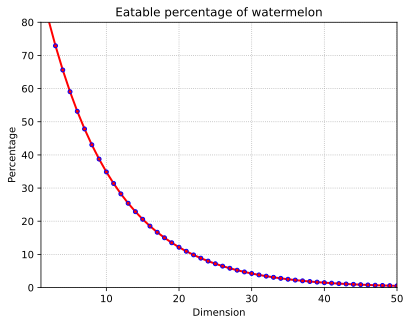

In [5]:
n_max = 50
ns = np.arange(1, n_max + 1)
p = 0.9
plt.plot(ns, 100*p**ns, lw=2, c='r', marker='o', markeredgecolor='b', markersize=4)
plt.ylim(0, 80)
plt.xlim(1, n_max)
plt.title("Eatable percentage of watermelon")
plt.xlabel("Dimension")
plt.ylabel("Percentage")
plt.grid(ls=":")

What are the consequenes of curse of the dimensionality for $k$-NN?

```{admonition} A common example from textbooks
Suppose we apply a $k$-NN classifier to data where the inputs are uniformly distributed in the $d$-dimensional unit cube. Suppose we estimate the density of class labels around a test point $\boldsymbol x$ by "growing" a hyper-cube around $\boldsymbol x$ until it contains a desired fraction $p$ of the data points. The expected edge length of this cube will be $e_d(p)=p^{\frac 1d}$ (see {cite:p}`pml1Book`, p. 530-531). For example, if $d=10$ and we want to capture $1\%$ of neighbours, we need extend the cube $e_{10}(0.01) \approx 0.63$ along each dimension around $\boldsymbol x$.
```

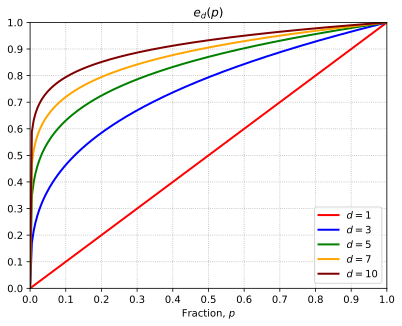

In [6]:
ps = np.linspace(0, 1, num=201)
ds = [1, 3, 5, 7, 10]
colors = ['r', 'b', 'g', 'orange', 'maroon']
for i, d in enumerate(ds):
    plt.plot(ps, ps**(1./d), lw=2, c=colors[i], label=f"$d={d}$")

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.title(r"$e_d(p)$")
plt.xlabel("Fraction, $p$")
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.legend()
plt.grid(ls=":")

## k-NN for Boston dataset

Load `Boston` dataset:

In [7]:
import pandas as pd

boston_df = pd.read_csv("../datasets/ISLP/Boston.csv").drop("Unnamed: 0", axis=1)
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


 Split it into feature matrix $\boldsymbol X$ and labels $\boldsymbol y$:

In [16]:
X = boston_df.drop("medv", axis=1)
y = boston_df["medv"]
boston_df.shape, X.shape, y.shape

((506, 13), (506, 12), (506,))

Import kNN model from `sklearn`, and do **fit-predict**:

In [17]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
y_hat = model.predict(X)
y_hat.shape

(506,)

Check MSE:

In [18]:
from sklearn.metrics import mean_squared_error

print("MSE loss:", mean_squared_error(y, y_hat))

MSE loss: 15.09318620992534


Study how MSE depends on the value of $k$ — number of neighbors:

In [19]:
for n_neighbors in range(1, 11):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X, y)
    y_hat = model.predict(X)
    print(f"MSE loss for {n_neighbors}-NN:", mean_squared_error(y, y_hat))

MSE loss for 1-NN: 0.0
MSE loss for 2-NN: 9.920642292490117
MSE loss for 3-NN: 15.09318620992534
MSE loss for 4-NN: 18.02147233201581
MSE loss for 5-NN: 20.895541501976286
MSE loss for 6-NN: 22.503348155467723
MSE loss for 7-NN: 23.99821368072921
MSE loss for 8-NN: 24.42564785079051
MSE loss for 9-NN: 25.821026204069682
MSE loss for 10-NN: 27.524774703557313


Looks like $1$-NN model is the best. Is it true? 

To evaluate a model, one needs to split the dataset into train and test:

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((379, 12), (379,), (127, 12), (127,))

Search for optimal number of neighbors:

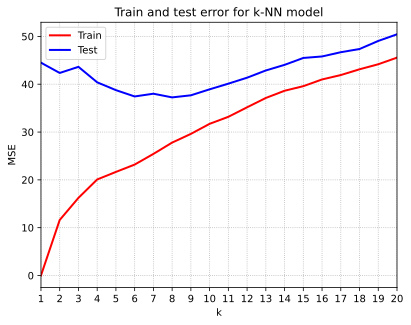

In [22]:
train_loss = []
test_loss = []
ks = np.arange(1, 21)
for n_neighbors in ks:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    train_loss.append(mean_squared_error(y_train, model.predict(X_train)))
    test_loss.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(ks, train_loss, lw=2, c='r', label="Train")
plt.plot(ks, test_loss, lw=2, c='b', label="Test")
plt.xlim(ks[0], ks[-1])
plt.xticks(ks)
plt.title("Train and test error for k-NN model")
plt.xlabel("k")
plt.ylabel("MSE")
plt.legend()
plt.grid(ls=":");


## k-NN for classification

Load a simple digit dataset:

In [23]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

Count samples of each class:

In [24]:
np.unique(digits.target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

Train a k-NN classifier for different values of $k$:

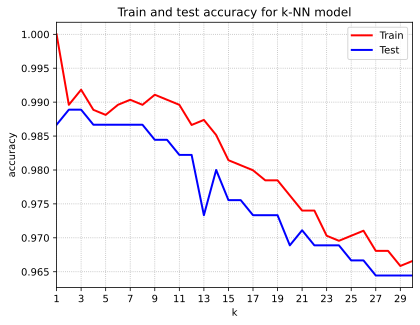

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_acc = []
test_acc = []
ks = np.arange(1, 31)
for n_neighbors in ks:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(ks, train_acc, lw=2, c='r', label="Train")
plt.plot(ks, test_acc, lw=2, c='b', label="Test")
plt.xlim(ks[0], ks[-1])
plt.xticks(ks[::2])
plt.title("Train and test accuracy for k-NN model")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend()
plt.grid(ls=":");

## Exercises

1. What is the predicted label of the green cirle in {numref}`simple-knn` by the k-NN model if $k=1$? $k=3$? $k=5$? $k=11$?

2. Show that $\Vert \boldsymbol x \Vert_\infty = \max\{\vert x_1\vert, \ldots, \vert x_d\vert\}$, i.e.,

    $$
        \lim\limits_{p\to +\infty} \Big(\sum\limits_{i=1}^d |x_i|^p \Big)^{\frac 1p} = \max\{\vert x_1\vert, \ldots, \vert x_d\vert\}.
    $$
    
3. Consider a model binary classification problem with one feature and two objects of the training set: $x_{1} = 0.2$, $x_2 = 0.7$. The first object belongs to the first class, the second — to the second. Let's add a new noise feature to the objects, uniformly distributed on the segment $[0, 1]$. Now each object is described by two float numbers. Let it be required to classify a new object $u = (0, 0)$ in this space by the **one** nearest neighbor method with the Euclidean metric. What is the probability that, after adding noise, the second object will be closer to the object $u$ than the first one?
<!--
```{admonition} TODO
:class: warning
* Make the last plot interactive
* Apply k-NN to some real datasets
* Add a plot and quiz on manual calculations with nearest neighbors
```
-->